In [1]:
#Part A


import random
from datetime import datetime, timedelta
import time


# Event Class
class Event:
    def __init__(self, event_id, title, date, time, location):
        self.id = event_id
        self.title = title
        self.date = date
        self.time = time
        self.location = location
        self.timestamp = datetime.strptime(f"{date} {time}", "%Y-%m-%d %H:%M")

    def __repr__(self):
        return (f"Event({self.id}, '{self.title}', '{self.date}', '{self.time}', "
                f"'{self.location}', timestamp='{self.timestamp.strftime('%Y-%m-%d %H:%M')}')")



# Dynamic Array Implementation

class EventArrayList:
    def __init__(self):
        self.capacity = 4
        self.size = 0
        self.events = [None] * self.capacity

    def insert(self, event):
        if self.size == self.capacity:
            self._resize()
        self.events[self.size] = event
        self.size += 1

    def _resize(self):
        new_capacity = self.capacity * 2
        new_events = [None] * new_capacity
        for i in range(self.size):
            new_events[i] = self.events[i]
        self.events = new_events
        self.capacity = new_capacity

    def delete(self, event_id):
        for i in range(self.size):
            if self.events[i].id == event_id:
                for j in range(i, self.size - 1):
                    self.events[j] = self.events[j + 1]
                self.events[self.size - 1] = None
                self.size -= 1
                return True
        return False

    def search_by_id(self, event_id):
        for i in range(self.size):
            if self.events[i].id == event_id:
                return self.events[i]
        return None

    def list_all(self):
        result = []
        for i in range(self.size):
            result.append(self.events[i])
        return result



# Singly Linked List Implementation

class Node:
    def __init__(self, event):
        self.event = event
        self.next = None

class EventLinkedList:
    def __init__(self):
        self.head = None

    def insert(self, event):
        new_node = Node(event)
        new_node.next = self.head
        self.head = new_node

    def delete(self, event_id):
        current = self.head
        prev = None
        while current:
            if current.event.id == event_id:
                if prev:
                    prev.next = current.next
                else:
                    self.head = current.next
                return True
            prev = current
            current = current.next
        return False

    def search_by_id(self, event_id):
        current = self.head
        while current:
            if current.event.id == event_id:
                return current.event
            current = current.next
        return None

    def list_all(self):
        result = []
        current = self.head
        while current:
            result.append(current.event)
            current = current.next
        return result


    def append(self, event):
        new_node = Node(event)
        if not self.head:
            self.head = new_node
            return
        temp = self.head
        while temp.next:
            temp = temp.next
        temp.next = new_node

    def to_list(self):
        events = []
        temp = self.head
        while temp:
            events.append(temp.event)
            temp = temp.next
        return events

    def from_list(self, events):
        self.head = None
        for e in events:
            self.append(e)


# Random Event Generator

def generate_random_events(n):
    titles = ["Hackathon", "Concert", "Seminar", "Exam", "Workshop", "Meetup"]
    locations = ["Auditorium", "Main Hall", "Room 101", "Lab A", "Cafeteria", "Library"]
    base_date = datetime(2025, 1, 1)

    events = []
    for i in range(n):
        title = random.choice(titles)
        date = (base_date + timedelta(days=random.randint(0, 365))).strftime("%Y-%m-%d")
        time = f"{random.randint(8, 20):02d}:{random.choice(['00','30'])}"
        location = random.choice(locations)
        events.append(Event(i, title, date, time, location))
    return events









## Complexity Analysis 

Part A



| Operation | EventArrayList | EventLinkedList |
|-----------|----------------|-----------------|
| **insert()** | O(1) typical, O(n) when resize | O(1) always |
| **delete()** | O(n) | O(n) |
| **search_by_id()** | O(n) | O(n) |
| **list_all()** | O(n) | O(n) |


The EventArrayList implementation uses a dynamic array approach where most insert operations run in O(1) time by simply placing an event at *self.events[self.size]* and incrementing the size counter. However, when the array becomes full *self.size == self.capacity*, the *resize()* method creates a new array with double the capacity and copies all existing elements, which takes O(n) time. Because the capacity doubles with each resize (4→8→16→32.....), these expensive copy operations happen less and less frequently as the array grows, making the average insertion very fast even though occasional insertions are slow. The delete operation always requires O(n) time because the code must first search through the array with *for i in range(self.size)* to find the target event, then shift all following elements leftward using *for j in range(i, self.size - 1)* to fill the gap. Similarly, *search_by_id()* must scan through the array linearly, checking each element until finding a match or reaching the end.

The EventLinkedList implementation has O(1) insertion every time by always adding new nodes at the head with just two pointer updates: *new_node.next = self.head and self.head = new_node*. However, deletion and search both require O(n) time because the code must traverse the linked structure node by node using *while* loop until finding the target or reaching the end. 

Both structures use O(n) space to store n events, but they differ in memory efficiency: arrays waste some space in unused capacity slots (if size=5 but capacity=8, three slots sit empty), while linked lists use extra memory for the next pointer in every node (essentially doubling the pointer storage compared to arrays).




In [2]:
#PART B



import matplotlib.pyplot as plt
def event_key(event):
    return datetime.strptime(f"{event.date} {event.time}", "%Y-%m-%d %H:%M")



#Array-based list


#Insertion sort on Dynamic Array
def insertion_sort_array(event_list):
    for i in range(1, event_list.size):
        key_event = event_list.events[i]
        key_value = key_event.timestamp
        j = i - 1
        while j >= 0 and event_list.events[j].timestamp > key_value:
            event_list.events[j + 1] = event_list.events[j]
            j -= 1
        event_list.events[j + 1] = key_event


#Merge sort on Dynamic Array
def merge_sort_array(events):
    if len(events) <= 1:
        return events
    mid = len(events) // 2
    left = merge_sort_array(events[:mid])
    right = merge_sort_array(events[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if event_key(left[i]) <= event_key(right[j]):
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

#Quick sort on Dynamic Array
def quick_sort_array(events):
    if len(events) <= 1:
        return events
    pivot = events[len(events) // 2]
    left = [x for x in events if event_key(x) < event_key(pivot)]
    middle = [x for x in events if event_key(x) == event_key(pivot)]
    right = [x for x in events if event_key(x) > event_key(pivot)]
    return quick_sort_array(left) + middle + quick_sort_array(right)


#Linked List

#Insertion sort on Linked List
def insertion_sort_linkedlist(ll):
    sorted_head = None
    current = ll.head
    while current:
        next_node = current.next
        sorted_head = sorted_insert_fast(sorted_head, current)
        current = next_node
    ll.head = sorted_head


def sorted_insert_fast(head, new_node):
    if not head or new_node.event.timestamp < head.event.timestamp:
        new_node.next = head
        return new_node

    current = head
    while current.next and current.next.event.timestamp < new_node.event.timestamp:
        current = current.next

    new_node.next = current.next
    current.next = new_node
    return head


#Merge sort on Linked List
def merge_sort_linkedlist(head):
    if not head or not head.next:
        return head
    middle = get_middle(head)
    next_to_middle = middle.next
    middle.next = None

    left = merge_sort_linkedlist(head)
    right = merge_sort_linkedlist(next_to_middle)

    return sorted_merge(left, right)

def sorted_merge(a,b):
    if not a:
        return b
    if not b:
        return a

    dummy = Node(None)
    tail = dummy

    while a and b:
        if event_key(a.event) <= event_key(b.event):
            tail.next = a
            a = a.next
        else:
            tail.next = b
            b = b.next
        tail = tail.next

    if a:
        tail.next = a
    elif b:
        tail.next = b

    return dummy.next



def get_middle(head):
    if not head:
        return head
    slow = head
    fast = head
    while fast.next and fast.next.next:
        slow = slow.next
        fast = fast.next.next
    return slow


#Quick Sort Linked List
def quick_sort_linkedlist(ll):
    events = ll.to_list()
    events = quick_sort_array(events)
    ll.from_list(events)


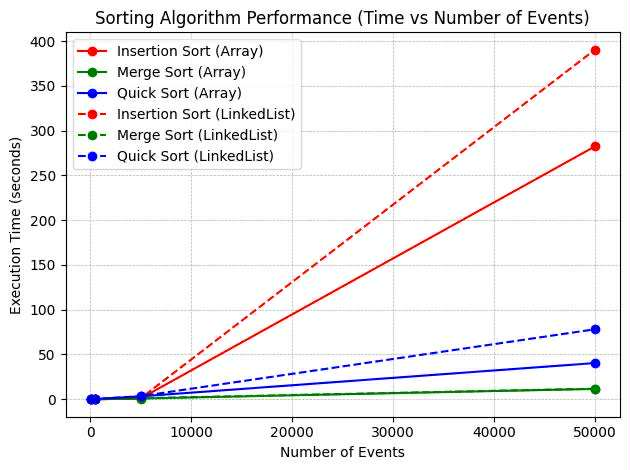

The graph follows the time complexities of the sorting algorithms. The time comparison makes it clear that insertion sort is better for up to 5000 events, but the time increases drastically for 50000 events as shown in the result. Overall, merge sort performed the best of the 3 sorting algorithms we used. Quick sort generally should be faster but here it’s slower than merge sort even though both are O (n logn) because of the recursive overheads here. That is something that can be worked on to improve the efficiency of the code.

## Complexity Analysis 

Part B

| Algorithm | Data Structure | Time Complexity | Space Complexity |
|------------|----------------|------------------|-------------------|
| **Insertion Sort** | Array | O(n²) | O(1) |
| **Merge Sort** | Array | O(n log n) | O(n) |
| **Quick Sort** | Array | O(n²) | O(n) |
| **Insertion Sort** | Linked List | O(n²) | O(1) |
| **Merge Sort** | Linked List | O(n log n) | O(1) |
| **Quick Sort** | Linked List | O(n²) | O(n) |


Few explanations:

The Quick Sort (Array) implementation could be less efficient because each recursive call builds three new lists (left, middle, and right). This means the algorithm performs about three full scans of the data at each recursion depth. In theory, Quick Sort’s space complexity should be O(log n) , but this implementation behaves closer to O(n) because of list creation and copying.  

The Merge Sort (Array) implementation could introduce inefficiency through Python’s list slicing. 
Each line *left = merge_sort_array(events[:mid])* and *right = merge_sort_array(events[mid:])* creates new sublists, each requiring O(n) time to copy elements. These extra copies occur at every recursion level, adding a hidden linear overhead. Theoretically, Merge Sort should always run in O(n log n) time, but this slicing can make the practical runtime closer to O(n log n + n).  


In [3]:
#Part C - Searching Algorithms



def linear_search_array_partc(event_array, event_id):
    for i in range(event_array.size):
        if event_array.events[i].id == event_id:
            return event_array.events[i]
    return None

def linear_search_linkedlist_partc(event_list, event_id):
    curr = event_list.head
    while curr:
        if curr.event.id == event_id:
            return curr.event
        curr = curr.next
    return None

def binary_search_array_partc(event_array, event_id):
    left, right = 0, event_array.size - 1
    while left <= right:
        mid = (left + right) // 2
        mid_id = event_array.events[mid].id
        if mid_id == event_id:
            return event_array.events[mid]
        elif mid_id < event_id:
            left = mid + 1
        else:
            right = mid - 1
    return None

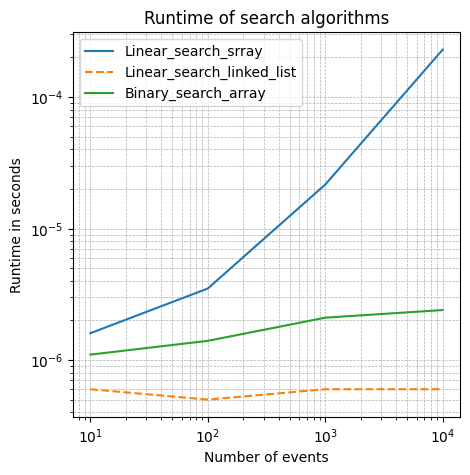

## Comparision of runtimes on sorted vs unsorted data and Searching Complexity Analysis

- Linear search - O(n) for both sorted and unsorted arrays and linked list, no runtime improvement can be made by sorting the data.
- Binary search - O(logn) for sorted arrays and it doesnt work efficiently on linked lists(O(nlogn)) and unsorted arrays

space complexity for both linear and binary search on array and as well as linked list is O(1)

In [4]:
#Part C - Conflict Detection Algorithms

#Conflict Detection on Array

def conflict_detection_array(event_array, checked_date):
    sorted_events = merge_sort_array(event_array.list_all())
    same_day_events = []
    for event in sorted_events:
        if event.date == checked_date:
            same_day_events.append(event)

    # Overlapping events
    result = []
    for i in range(len(same_day_events)):
        for j in range(i + 1, len(same_day_events)):
            if same_day_events[i].time == same_day_events[j].time and same_day_events[i].location == same_day_events[j].location:
                result.append((same_day_events[i], same_day_events[j]))
    return result



In [5]:
#Conflict Detection on Linked List

def conflict_detection_linkedlist(event_linkedlist, checked_date):
    event_linkedlist.head = merge_sort_linkedlist(event_linkedlist.head)

    sorted_events = event_linkedlist.to_list()

    same_day_events = []
    for event in sorted_events:
        if event.date == checked_date:
            same_day_events.append(event)

    # Overlapping events
    result = []
    for i in range(len(same_day_events)):
        for j in range(i + 1, len(same_day_events)):
            if same_day_events[i].time == same_day_events[j].time and same_day_events[i].location == same_day_events[j].location:
                result.append((same_day_events[i], same_day_events[j]))

    return result

## Complexity Analysis 

Part C

The conflict_detection_array() algorithm first creates a copy of all events and sorts them using merge sort. Copying the list of events already requires O(n) time and space, and then sorting process itself runs in O(n log n). In the worst case, if all events occur on a single date, this nested comparison loop can take up to O(n²) time. However, for typical data where only a subset of events share the same date, the overall runtime is dominated by the O(n log n) sorting step. The space complexity is O(n) because of the temporary arrays created during copying and merging.

The conflict_detection_linkedlist() algorithm follows similar logic. It first converts the linked list into a standard Python list using to_list(), which takes O(n) time and space, and then sorts the events using merge sort with a O(n log n) runtime. After sorting, it is again reaching a worst-case time complexity of O(n²) if all events share the same date. However, as with the array version, the overall complexity is in practice dominated by sorting and data conversion, giving a total runtime of O(n log n) and a space complexity of O(n).

One improvement, I should have done, is to make the output of the conflict detection more readable. Right now, the algorithm simply prints overlapping pairs of events in a raw list format, which quickly becomes difficult to follow when many overlaps occur. A better approach would be to group the events by their time and print them as a small table, where each row represents a specific hour and shows all events happening at that moment in the same location.
If only I felt more comfortable with grouping the data, I would surely implement it here already.

Another thing I noticed after finishing the code is that I could have filtered the data for the selected date before calling the merge sort. Right now, the algorithm sorts all events first and only then selects the ones from the chosen date, which means it spends time sorting many unnecessary records. It would be more efficient to first extract only the events from the checked date and sort just that smaller subset. 

In [ ]:
#Part D

In [31]:
#Helper code to measure the size of Array with 1 000 000 Events

import sys
import struct

event = Event(3517, "Hackathon", "2025-08-03", "19:30", "Auditorium")

print("Event object:", sys.getsizeof(event))
print("Event.__dict__:", sys.getsizeof(event.__dict__))
print("int (id):", sys.getsizeof(event.id))
print("datetime (timestamp):", sys.getsizeof(event.timestamp))
print("title:", sys.getsizeof(event.title))
print("date:", sys.getsizeof(event.date))
print("time:", sys.getsizeof(event.time))
print("location:", sys.getsizeof(event.location))

print("Pointer size:", struct.calcsize("P"))
print("Empty list:", sys.getsizeof([]))
list = [None]
print("List with 1 element:", sys.getsizeof(list))




Event object: 48
Event.__dict__: 120
int (id): 28
datetime (timestamp): 48
title: 50
date: 51
time: 46
location: 51
Pointer size: 8
Empty list: 56
List with 1 element: 64


## Memory Estimate — Dynamic Array (1 000 000 Events)

What One Event Costs 
- **Event object:** 48 B  
- **__dict__:** 120 B  
- **id (int):** 28 B  
- **timestamp (datetime):** 48 B  
- **title (str):** 50 B  
- **date (str):** 51 B  
- **time (str):** 46 B  
- **location (str):** 51 B  
- 48 + 120 + 28 + 48 + 50 + 51 + 46 + 51 = 444 B


1 000 000 Events
- 1 000 000 × 444 B =  444 000 000 B ≈ 444 MB


Dynamic Array
- **Capacity for 1,000,000 items:** 1 048 576 (2^20)  
- **List header:** 56 B  
- **Pointers:** 1 048 576 × 8 B = 8 388 608 B  
- 56 + 8 388 608 = 8 388 664 B ≈ 8.39 MB



Total (Array + Events)
- **Events:** ~444 MB  
- **List container:** ~8.39 MB  
- **Total:** **~450 MB**



In [62]:
#Helper code to measure the size of Linked List with 1 000 000 Events

import sys
import struct

event = Event(3517, "Hackathon", "2025-08-03", "19:30", "Auditorium")
node = Node(event)

print("Event object:", sys.getsizeof(event))
print("Event.__dict__:", sys.getsizeof(event.__dict__))
print("int (id):", sys.getsizeof(event.id))
print("datetime (timestamp):", sys.getsizeof(event.timestamp))
print("title:", sys.getsizeof(event.title))
print("date:", sys.getsizeof(event.date))
print("time:", sys.getsizeof(event.time))
print("location:", sys.getsizeof(event.location))

print("Node object:", sys.getsizeof(node))
print("Node.__dict__:", sys.getsizeof(node.__dict__))
print("Pointer size:", struct.calcsize("P"))


Event object: 48
Event.__dict__: 120
int (id): 28
datetime (timestamp): 48
title: 50
date: 51
time: 46
location: 51
Node object: 48
Node.__dict__: 88
Pointer size: 8


## Memory Estimate — Linked List (1 000 000 Events)
- Important: Each element in a linked list stores both the Event and its Node.  


What One Event + Node Costs  
- **Event object:** 48 B  
- **Event.__dict__:** 120 B  
- **id (int):** 28 B  
- **timestamp (datetime):** 48 B  
- **title (str):** 50 B  
- **date (str):** 51 B  
- **time (str):** 46 B  
- **location (str):** 51 B  
- **Node object:** 48 B  
- **Node.__dict__:** 88 B  
- 48 + 120 + 28 + 48 + 50 + 51 + 46 + 51 + 48 + 88 = 578 B

  
Total: 1 000 000 Nodes (each holding one Event)  
- 1 000 000 × 578 B = 578 000 000 B ≈ 578 MB



## To improve scalability and reduce memory usage: 

1. The system can store only current and upcoming events in active memory while moving older records to an archive database or compressed file. It is based on a assumption that events that past a defined threshold (for example, 30 days) are rarely accessed. This approach limits the amount of data loaded into RAM, and thanks to that speeds up sorting, searching, and conflict detection operations. Archived data can be always retrieved on demand.

2. Another optimization involves splitting event data by location so that each building administrator accesses only the events relevant to their area. For instance, all “Auditorium” events would be stored in one small database, while “Main Hall” or “Lab A” would have their own tables.

3. To minimize redundancy in storing, event types and locations can be stored as numeric codes instead of repeating full strings for every record. When displaying data to the user, these numeric identifiers are joined with the general table to retrieve the readable names. A simple lookup dictionary is maintained, for example:

| event_id | event_name  |
|-----------|--------------|
| **1** | Hackathon |
| **2** | Concert |
| **3** | Seminar |
| **4** | Exam |
| **5** | Workshop |

## Parallel Conflict Detection (Multi-core idea)


Each CPU core is assigned to handle events from one location (for example, Auditorium, Main Hall, Lab A). This ensures there is no overlap or dependency between processes, since in our approach conflicts can only occur within the same location.

Before sorting, each CPU is given the exact date to analyze. It first filters events for that date, then performs sorting and conflict detection locally. This minimizes the dataset size and ensures that sorting only happens on relevant records.

After all CPUs complete their tasks, the system merges the outputs by combining results from each core into a single, conflict list for the given date. This design is simple yet highly efficient, achieving maximum parallel performance with minimal coordination between processes, and making it an ideal approach for large scale event scheduling.

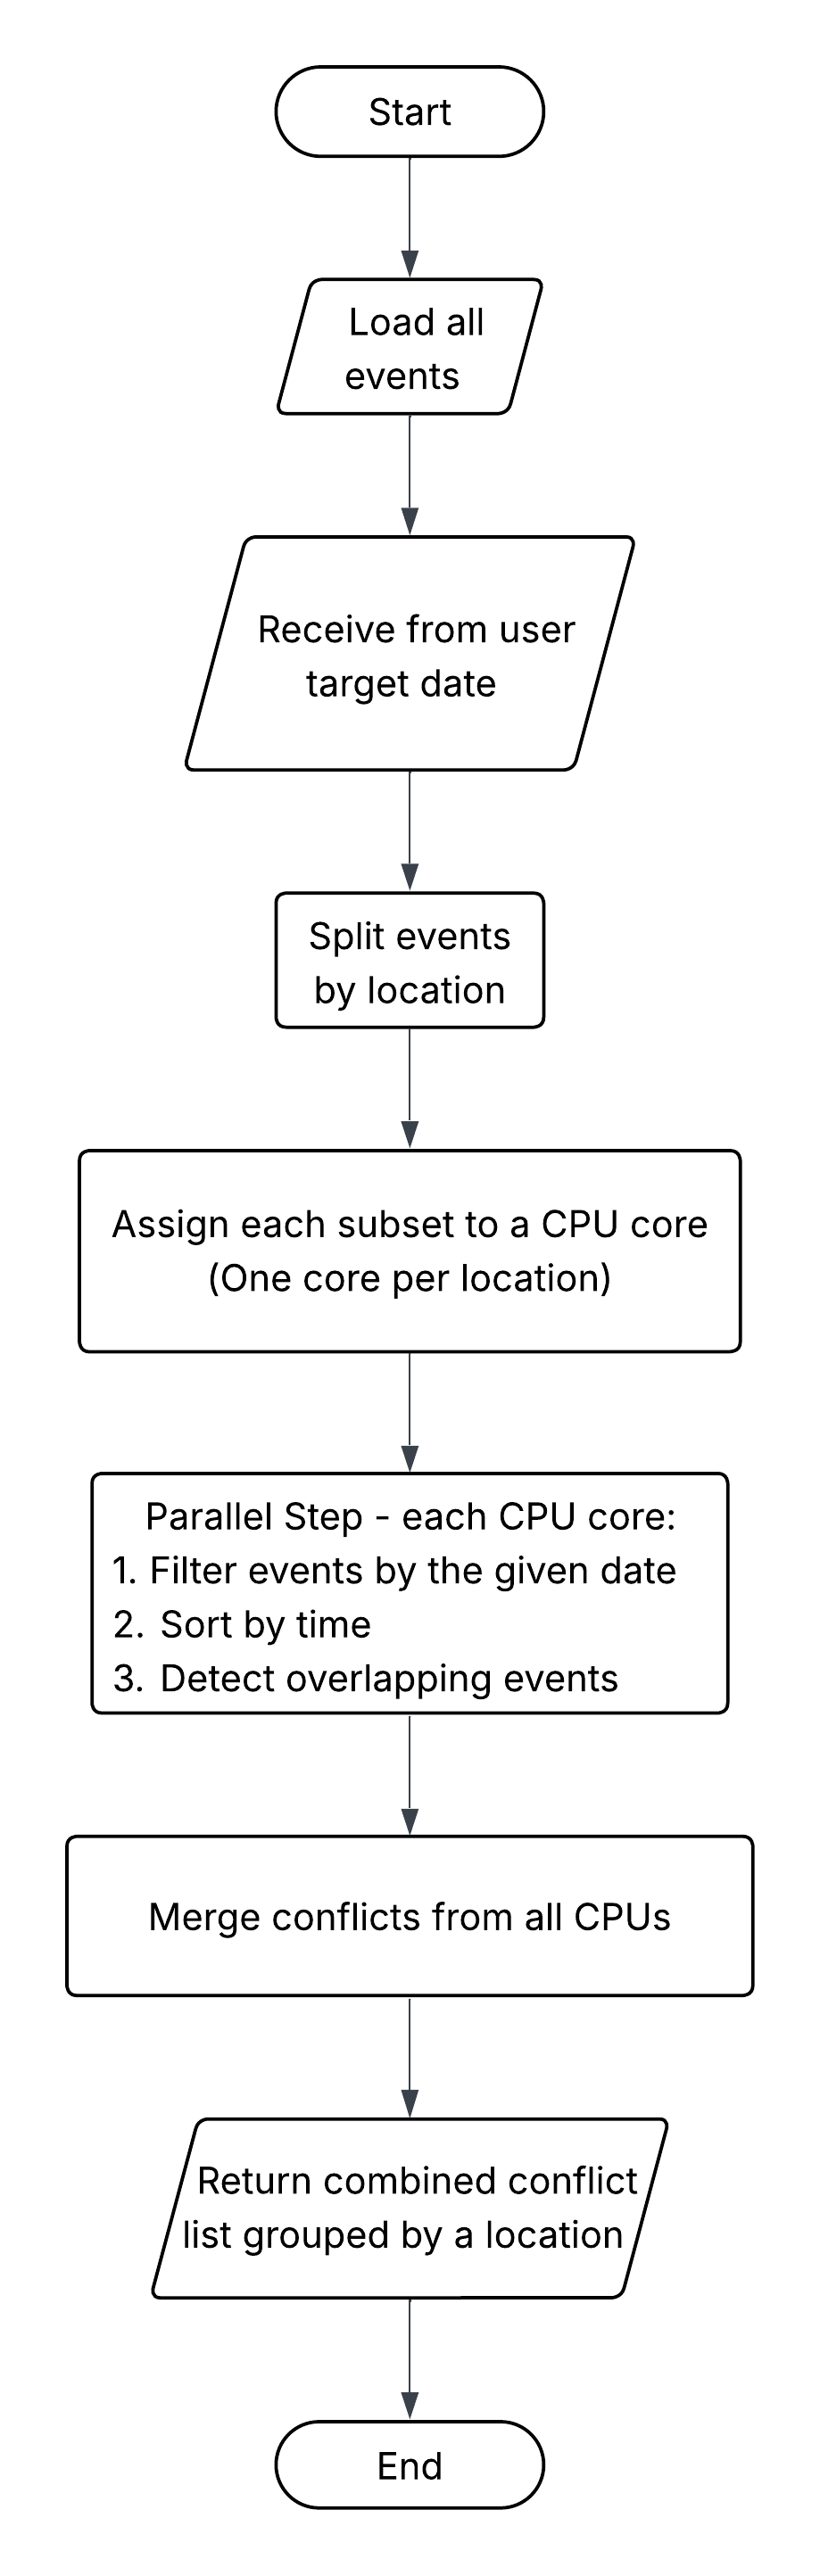

In [1]:
from IPython.display import Image, display
display(Image(filename=r"C:\Users\Antoni\Downloads\Blank diagram.png", width=400))